# MNIST 손글씨 숫자 분류 실습 노트북

이 노트북은 MNIST 손글씨 숫자 이미지 데이터를 신경망 모델로 분류하는 전체 과정을 다룹니다.

## 구성 내용
1. **데이터 로딩 및 전처리**: MNIST CSV 파일을 불러와 학습/테스트 데이터로 분리합니다.
2. **이미지 시각화**: 샘플 이미지를 시각적으로 확인할 수 있는 함수를 정의합니다.
3. **신경망 모델 구현**: 모델 구조, 파라미터 초기화, 활성화 함수, 예측 함수 등을 구현합니다.
4. **사전 학습된 가중치 불러오기**: pickle 파일로 저장된 신경망 파라미터를 불러옵니다.
5. **정확도 평가**: 전체 테스트 데이터 또는 배치 단위로 예측 정확도를 계산합니다.
6. **연산 흐름 및 시각적 설명**: 각 단계별 연산 흐름을 마크다운과 이미지로 설명합니다.

---

### 1. 데이터 로딩 및 전처리
MNIST CSV 파일을 불러와 학습/테스트 데이터로 분리합니다.

In [137]:
# 필요한 라이브러리 불러오기
import pandas as pd  # 데이터프레임 처리용
import numpy as np   # 수치 연산용
import matplotlib.pyplot as plt  # 시각화용
import pickle  # 파라미터 파일 불러오기용

# MNIST 학습/테스트 데이터 불러오기
df_train = pd.read_csv('../data/mnist_train.csv')  # 학습 데이터
df_test = pd.read_csv('../data/mnist_test.csv')    # 테스트 데이터

# 데이터 크기 확인 (행, 열)
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [138]:
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train["label"])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test["label"])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### 2. 이미지/라벨 분리
이미지 데이터(X)와 라벨(y)을 각각 numpy 배열로 변환합니다.

In [139]:
def img_show(img):
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

### 3. 이미지 시각화 함수 정의
샘플 이미지를 시각적으로 확인할 수 있는 함수를 만듭니다.

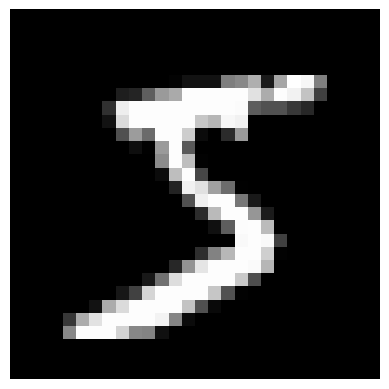

In [140]:
img = X_train[0]
label = y_train[0]

img_show(img)

### 4. 샘플 이미지 출력
첫 번째 학습 이미지를 시각화합니다.

In [141]:
def init_network():
    with open('../data/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

### 5. 사전 학습된 신경망 파라미터 불러오기
pickle 파일로 저장된 신경망 파라미터를 불러옵니다.

In [142]:
# def init_network():
#     network = {}
#     network['W1'] = np.random.randn(784, 50)
#     network['b1'] = np.random.randn(50)
#     network['W2'] = np.random.randn(50, 100)
#     network['b2'] = np.random.randn(100)
#     network['W3'] = np.random.randn(100, 10)
#     network['b3'] = np.random.randn(10)
#     return network

In [143]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

### 6. 신경망 모델 및 활성화 함수 구현
신경망의 순전파, 활성화 함수(sigmoid, softmax), 예측 함수(predict)를 정의합니다.

In [144]:
network = init_network()
accuracy_cnt = 0
for i in range(len(X_test)):
    y = predict(network, X_test[i])
    p = np.argmax(y)
    if p == y_test[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(X_test)))

/tmp/ipykernel_11186/1838522735.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


### 7. 테스트 데이터 예측 및 정확도 평가
신경망으로 테스트 데이터를 예측하고, 정확도를 계산합니다.

- 아래 두 가지 방법이 있습니다:
    1. **단일 샘플 반복 처리**: 테스트 데이터를 하나씩 예측
    2. **배치(batch) 단위 처리**: 여러 샘플을 한 번에 묶어 예측 (속도 향상)

아래 8장에서는 배치 단위 처리 방법을 예시로 보여줍니다.

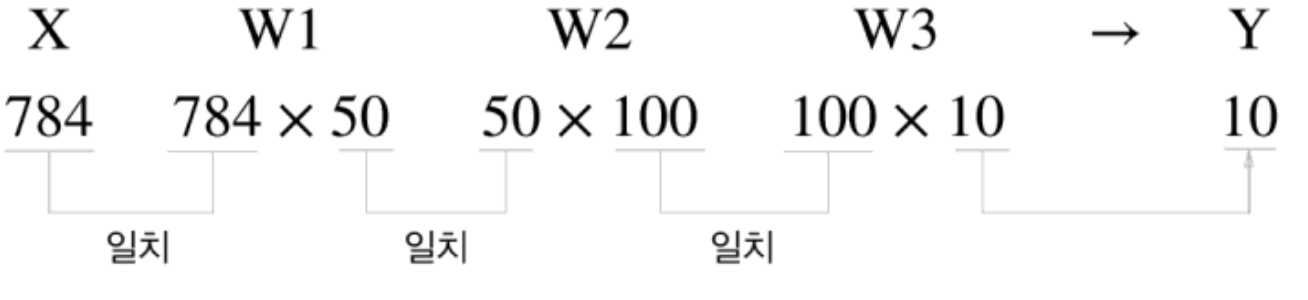

100개씩 묶어서 처리한다면
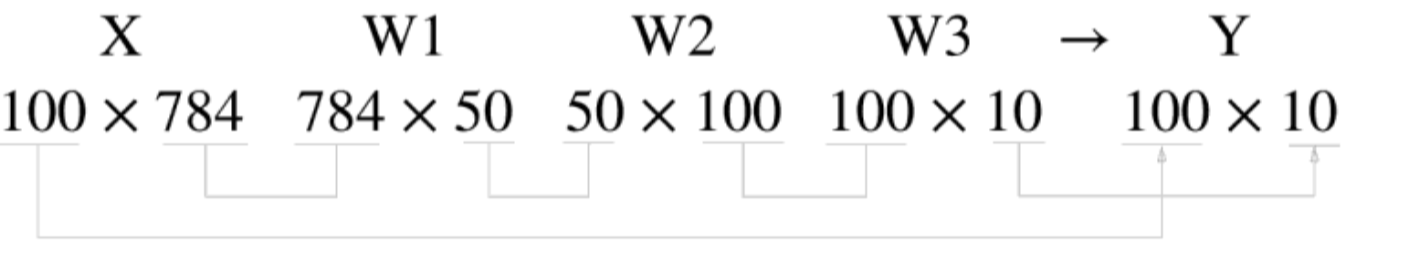

테스트 데이터를 100개씩 묶어서 예측하고, 전체 정확도를 계산합니다.

In [145]:
# 배치 사이즈와 에포크를 이용한 정확도 계산 예시
batch_size = 100
epochs = 5
for epoch in range(epochs):
    accuracy_cnt = 0
    for i in range(0, len(X_test), batch_size):
        X_batch = X_test[i : i + batch_size]
        y_batch = predict(network, X_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == y_test[i : i + batch_size])
    print(f"Epoch {epoch+1}: Accuracy = {float(accuracy_cnt) / len(X_test):.4f}")

Epoch 1: Accuracy = 0.9207


/tmp/ipykernel_11186/1838522735.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2: Accuracy = 0.9207
Epoch 3: Accuracy = 0.9207
Epoch 4: Accuracy = 0.9207
Epoch 4: Accuracy = 0.9207
Epoch 5: Accuracy = 0.9207
Epoch 5: Accuracy = 0.9207
